# Music Genre Classifier
--- 
## Imports:

In [19]:
# Usual Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Librosa - for audio and music processing
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

print("Succesfully imported libraries")

Succesfully imported libraries


In [20]:
# Download Dataset:

import kagglehub
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\janmi\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1


### The Data Folder contains:

* **genres original folder** (collection of 10 genres - each with 100 thirty second long audio files)
* **images original folder** (visual representation for each audio file)
* **features_30_seconds.csv file**  (containing features of the audio files)
* **features_3_seconds.csv file**   (same structure - but this time the songs were split into 3-second parts -> More Data) 

In [15]:
print(list(os.listdir(f'{path}\Data')))

['features_30_sec.csv', 'features_3_sec.csv', 'genres_original', 'images_original']


---

## Explore Audio Data

In [38]:
# Import one file...
y, sr = librosa.load(f'{path}\\Data\\genres_original\\blues\\blues.00014.wav')

print('y: ', y, '\n')
print('y shape: ', np.shape(y), '\n')
print('Sample Rate (KHz): ', sr, '\n')

print("Length of Audio(samples/samplerate): ", 661794/sr, "sec")

y:  [0.07705688 0.11590576 0.09234619 ... 0.07122803 0.06323242 0.04721069] 

y shape:  (661794,) 

Sample Rate (KHz):  22050 

Length of Audio(samples/samplerate):  30.013333333333332 sec


In [40]:
# Trim silence in the beginning an end:
audio_file, _ = librosa.effects.trim(y)

print("Audio File: ", audio_file, "\n")
print("Audio File shape: ", np.shape(audio_file))

Audio File:  [0.07705688 0.11590576 0.09234619 ... 0.07122803 0.06323242 0.04721069] 

Audio File shape:  (661794,)


## 2D Representation:

Text(0.5, 1.0, 'Sound waves in Blues.00014.wav')

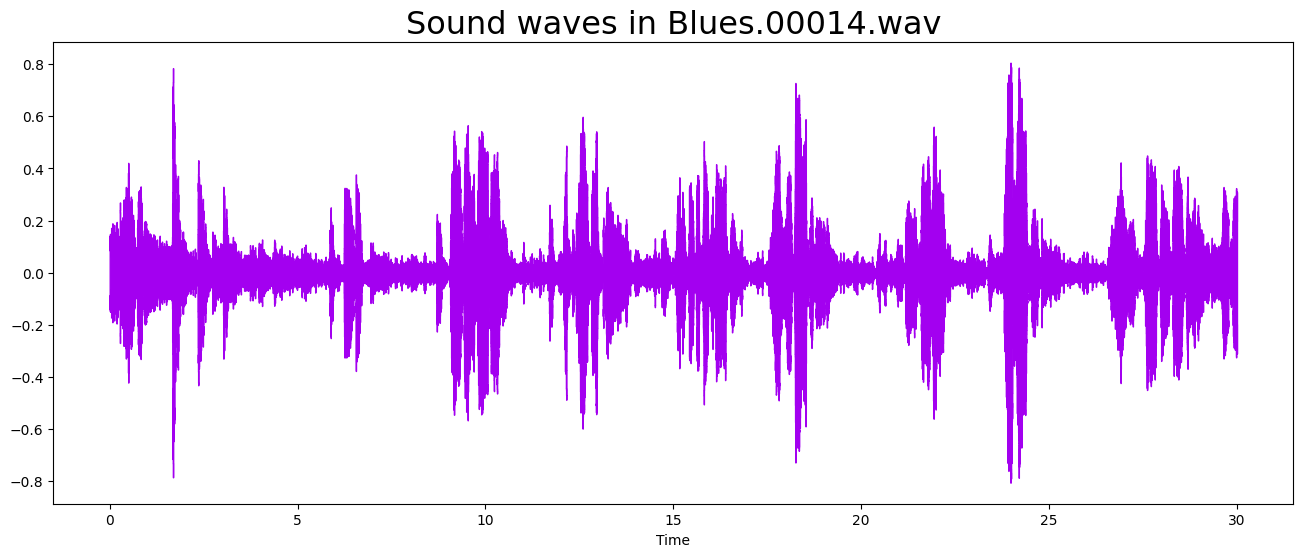

In [43]:
plt.figure(figsize=(16,6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F0");
plt.title("Sound waves in Blues.00014.wav", fontsize=23)

### Fourier Transform:

* integral transform that takes a signal function as input and outputs another function that describes the extent to which various frequencies are present in the input function

* The transform contains both the y-axis(frequency) to log scale and the "color" axis (amplitude)

In [46]:
n_fft = 2048
hop_length = 512

# Short-time Fourier transform
D = np.abs(librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length))

print("Shape of D object: ", np.shape(D))



Shape of D object:  (1025, 1293)


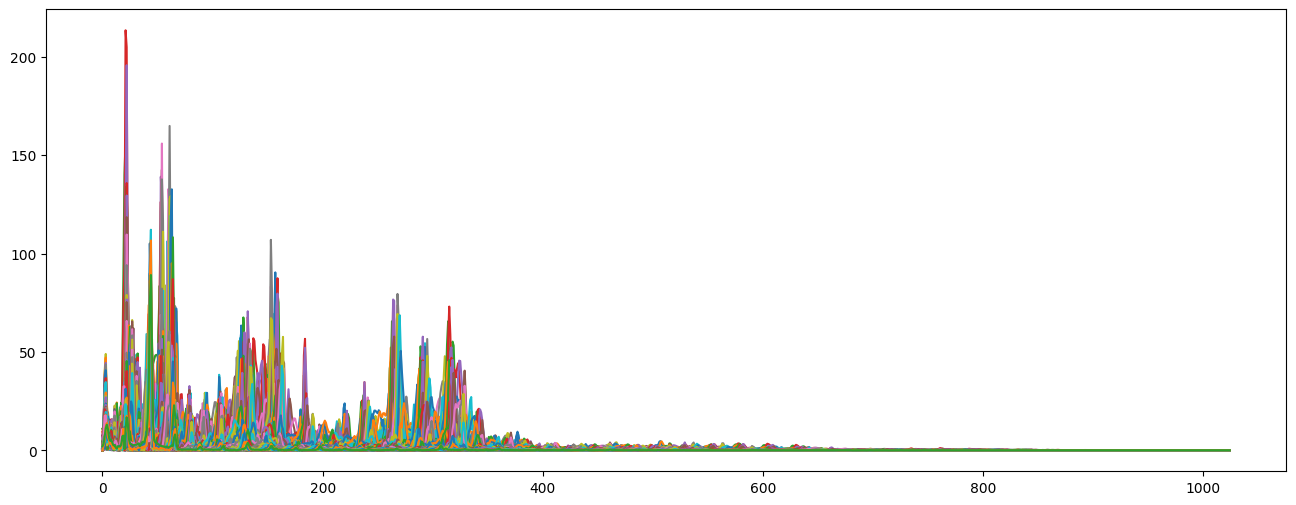

In [52]:
plt.figure(figsize=(16,6))
plt.plot(D);

### FFT-Spectogram:

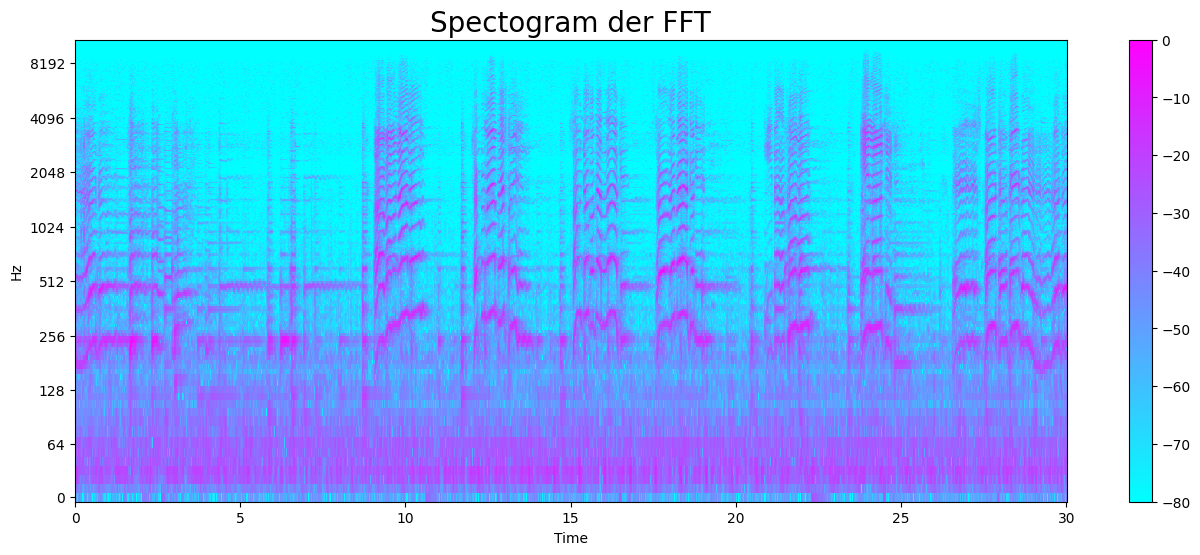

In [ ]:
# Convert amplitude spectrogram to decibel-scaled spectogram
DB = librosa.amplitude_to_db(D, ref = np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(DB, y_axis='log', x_axis='time', sr=sr, hop_length=hop_length, cmap= 'cool')
plt.title('Spectogram der FFT', fontsize=20)
plt.colorbar();
plt.show()

### Mel Spectogram

Text(0.5, 1.0, 'Mel Spectogram - Classical.00095')

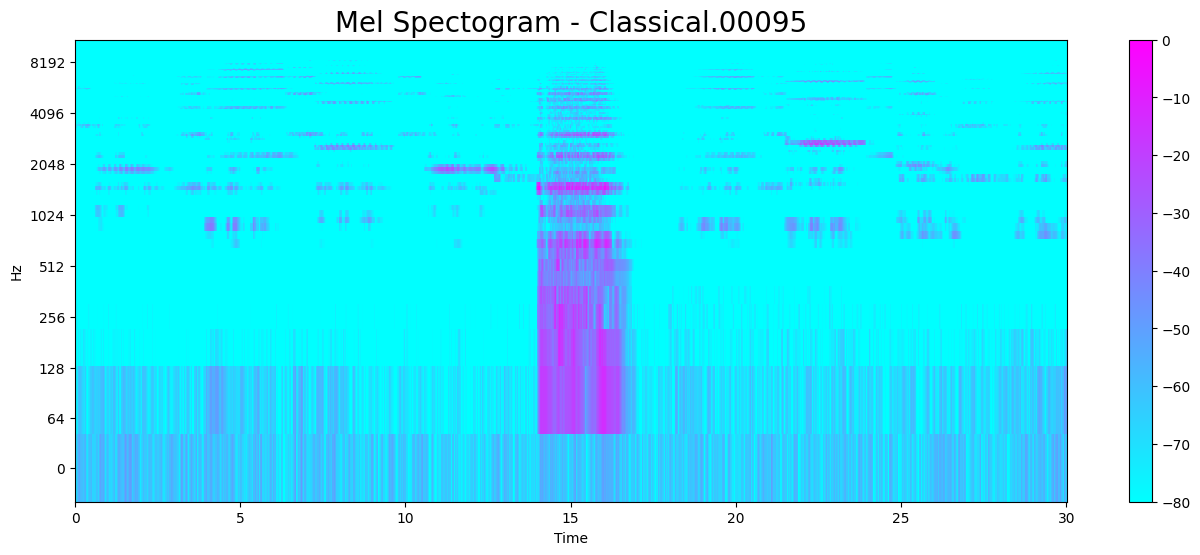

In [ ]:
y_trim, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y=y_trim, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', cmap='cool');
plt.colorbar();
plt.title('Mel Spectogram - Classical.00095', fontsize=20)